In [1]:
%load_ext autotime

time: 125 µs (started: 2023-11-27 08:08:10 -05:00)


# Import Modules - AI574 Module is specific to this project

In [2]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1" # Comment this out to run on GPU
import tensorflow as tf
tf.load_library("/etc/alternatives/libcudnn_so")
import re
import requests
import zipfile
import pandas as pd
import numpy as np
import random
random.seed(123)

import AI574Project
from AI574Project import *


2023-11-27 08:08:10.849451: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 08:08:10.849486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 08:08:10.849514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 08:08:10.855511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 08:08:11.616686: W tensorflow/compiler/

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


2023-11-27 08:08:14.890521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 08:08:14.890715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 08:08:14.890859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

time: 6.86 s (started: 2023-11-27 08:08:10 -05:00)


# Establish NER Capabilities

### Three methods are explored:
1) Statistical
2) Deep Learning - Leverages ConLL data
3) Industry Benchmark - Leverages SpACY module

1) Statistical

In [3]:
quote_indicator = AI574Project.QuotationIndicator()
StatisticalNameData = AI574Project.StatisticalNameData()

ssa_data_dir = './data/ssa_names'
unique_names_list, pronouns, person_titles = StatisticalNameData.create_common_name_dataset(ssa_data_dir)
unique_names_list = StatisticalNameData.append_known_names(AI574Project.hobbit_characters)

time: 1.4 s (started: 2023-11-27 08:08:17 -05:00)


2) Deep Learning

In [4]:
ner_data_importer = AI574Project.ImportNERData(source="existing")
train_dataset, val_dataset, lookup_layer = ner_data_importer.import_data()

Importing preloaded training and validation data
File /media/daniel/HDD1/AI574/Project/vocabulary.txt exists. Overwriting existing file.
time: 472 ms (started: 2023-11-27 08:08:18 -05:00)


Epoch 1/50


2023-11-27 08:08:25.917822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-27 08:08:26.057643: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f03dc009d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-27 08:08:26.057668: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-11-27 08:08:26.057673: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-11-27 08:08:26.061982: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-27 08:08:26.149666: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    110/Unknown - 29s 186ms/step - loss: 0.2842 - accuracy: 0.2932

2023-11-27 08:08:48.119833: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 8140317484831278845
2023-11-27 08:08:48.119868: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 439808643604059875
2023-11-27 08:08:48.119878: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16251536085717876763
2023-11-27 08:08:48.119886: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 17355934975154215468
2023-11-27 08:08:48.119893: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 10110358874991527287


110/110 [==============================] - 30s 201ms/step - loss: 0.2842 - accuracy: 0.2932 - val_loss: 0.2027 - val_accuracy: 0.2751
Epoch 2/50
  1/110 [..............................] - ETA: 9s - loss: 0.1312 - accuracy: 0.3489

2023-11-27 08:08:49.710013: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 915762200189230804
2023-11-27 08:08:49.710050: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 5608965550771115741
2023-11-27 08:08:49.710064: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 12529566203899100894


110/110 [==============================] - 10s 91ms/step - loss: 0.0641 - accuracy: 0.3083 - val_loss: 0.0592 - val_accuracy: 0.2871
Epoch 3/50
110/110 [==============================] - 10s 91ms/step - loss: 0.0131 - accuracy: 0.3136 - val_loss: 0.0415 - val_accuracy: 0.2888
Epoch 4/50
110/110 [==============================] - 10s 91ms/step - loss: 0.0066 - accuracy: 0.3142 - val_loss: 0.0478 - val_accuracy: 0.2885
Epoch 5/50
110/110 [==============================] - 10s 90ms/step - loss: 0.0043 - accuracy: 0.3144 - val_loss: 0.0468 - val_accuracy: 0.2888
Epoch 6/50
110/110 [==============================] - 10s 92ms/step - loss: 0.0030 - accuracy: 0.3145 - val_loss: 0.0420 - val_accuracy: 0.2892
Epoch 6: early stopping
INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int64, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579c6a0>, 139658042892464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int64, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579c6a0>, 139658042892464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int32, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04657e1030>, 139658042892304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int32, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04657e1030>, 139658042892304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579f3d0>, 139658042892784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579f3d0>, 139658042892784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579d4b0>, 139658042892944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579d4b0>, 139658042892944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561c220>, 139658042894064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561c220>, 139658042894064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561d150>, 139658042894224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561d150>, 139658042894224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561e080>, 139658042895024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561e080>, 139658042895024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561efb0>, 139658042895184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561efb0>, 139658042895184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561fee0>, 139658042896304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561fee0>, 139658042896304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465660e80>, 139658042896464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465660e80>, 139658042896464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465661db0>, 139655298625136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465661db0>, 139655298625136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465662d40>, 139656702417584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465662d40>, 139656702417584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465663c70>, 139655298800640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465663c70>, 139655298800640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a8c40>, 139655298800960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a8c40>, 139655298800960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a9ba0>, 139655298194608), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a9ba0>, 139655298194608), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aab00>, 139655298194992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aab00>, 139655298194992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aba60>, 139655298499568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aba60>, 139655298499568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f4a00>, 139655298499728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f4a00>, 139655298499728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f5930>, 139656701599952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f5930>, 139656701599952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f68c0>, 139656078956976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f68c0>, 139656078956976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f77f0>, 139655299100848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f77f0>, 139655299100848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465538760>, 139655298501968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465538760>, 139655298501968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655396f0>, 139655299101488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655396f0>, 139655299101488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553a620>, 139655299102000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553a620>, 139655299102000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553b550>, 139655298502128), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553b550>, 139655298502128), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465580520>, 139655299099056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465580520>, 139655299099056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465581450>, 139656078964848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465581450>, 139656078964848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655823e0>, 139656701598320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655823e0>, 139656701598320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465583310>, 139656077582256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465583310>, 139656077582256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655c02e0>, 139656077583408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655c02e0>, 139656077583408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int64, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579c6a0>, 139658042892464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int64, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579c6a0>, 139658042892464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int32, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04657e1030>, 139658042892304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((IndexedSlicesSpec(TensorShape([None, 32]), tf.float32, tf.int32, tf.int32, TensorShape([None])), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04657e1030>, 139658042892304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579f3d0>, 139658042892784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579f3d0>, 139658042892784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579d4b0>, 139658042892944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046579d4b0>, 139658042892944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561c220>, 139658042894064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561c220>, 139658042894064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561d150>, 139658042894224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561d150>, 139658042894224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561e080>, 139658042895024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32, 4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561e080>, 139658042895024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561efb0>, 139658042895184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561efb0>, 139658042895184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561fee0>, 139658042896304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4, 32, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046561fee0>, 139658042896304), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465660e80>, 139658042896464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465660e80>, 139658042896464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465661db0>, 139655298625136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465661db0>, 139655298625136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465662d40>, 139656702417584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465662d40>, 139656702417584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465663c70>, 139655298800640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465663c70>, 139655298800640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a8c40>, 139655298800960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a8c40>, 139655298800960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a9ba0>, 139655298194608), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656a9ba0>, 139655298194608), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aab00>, 139655298194992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aab00>, 139655298194992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aba60>, 139655298499568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656aba60>, 139655298499568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f4a00>, 139655298499728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f4a00>, 139655298499728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f5930>, 139656701599952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f5930>, 139656701599952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f68c0>, 139656078956976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f68c0>, 139656078956976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f77f0>, 139655299100848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04656f77f0>, 139655299100848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465538760>, 139655298501968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465538760>, 139655298501968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655396f0>, 139655299101488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655396f0>, 139655299101488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553a620>, 139655299102000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553a620>, 139655299102000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553b550>, 139655298502128), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1024, 4096), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f046553b550>, 139655298502128), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465580520>, 139655299099056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(4096,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465580520>, 139655299099056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465581450>, 139656078964848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465581450>, 139656078964848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655823e0>, 139656701598320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655823e0>, 139656701598320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465583310>, 139656077582256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f0465583310>, 139656077582256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655c02e0>, 139656077583408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f04655c02e0>, 139656077583408), {}).


INFO:tensorflow:Assets written to: NER_saved_recent/assets


INFO:tensorflow:Assets written to: NER_saved_recent/assets


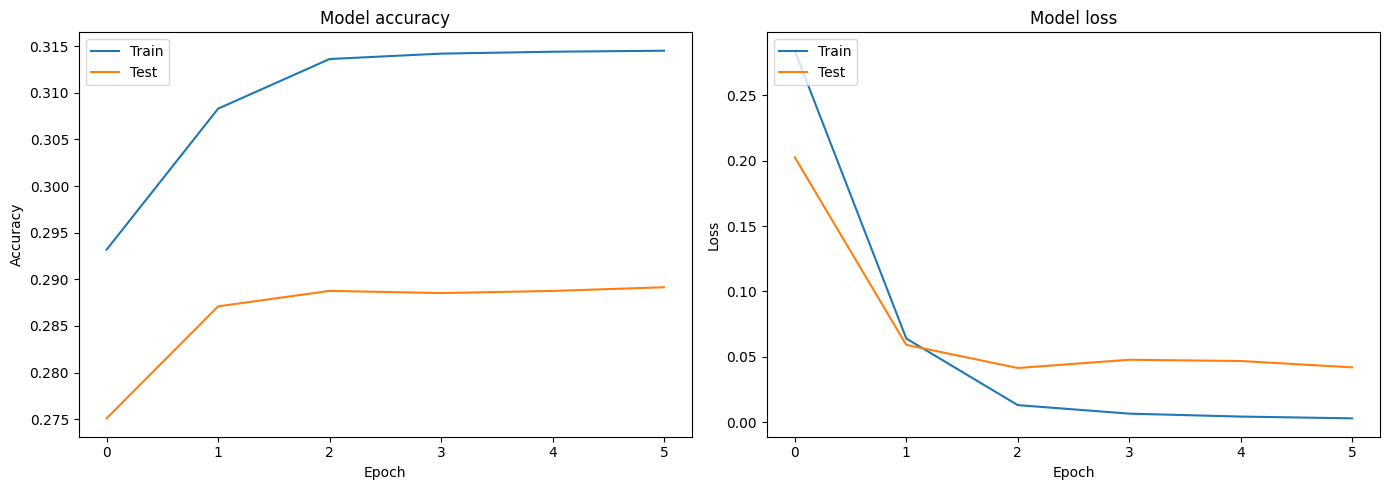

time: 1min 28s (started: 2023-11-27 08:08:19 -05:00)


In [5]:
train = "Y"
if train == "Y":
    train_ner_model = TrainNERNamePrediction()
    train_ner_model.build_model()
    train_ner_model.compile_model()
    ner_history = train_ner_model.train(train_data=train_dataset,
                                val_data = val_dataset,
                                epochs=50, batch_size=256) 
    train_ner_model.save_model('NER_saved_recent')
    AI574Project.plot_training_charts(ner_history) 

In [6]:
ner_model = tf.keras.models.load_model('NER_saved_recent', custom_objects={'NERNonPaddingTokenLoss': NERNonPaddingTokenLoss})

time: 3.83 s (started: 2023-11-27 08:09:47 -05:00)


In [7]:
def lowercase_and_convert_to_ids(tokens):
    tokens = tf.strings.lower(tokens)
    return lookup_layer(tokens)
def tokenize_and_convert_to_ids(text):
    tokens = text.split()
    return lowercase_and_convert_to_ids(tokens)

sample_input = tokenize_and_convert_to_ids(
    "Buyers	also	snapped	up	16	other	items	that	were	put	up	for	auction	by	Hendrix	's	former	girlfriend	Kathy	Etchingham	,	who	lived	with	him	from	1966	to	1969"
)
sample_input = tf.reshape(sample_input, shape=[1, -1])
print(sample_input)

output = ner_model.predict(sample_input)
prediction = np.argmax(output, axis=-1)[0]
prediction = [MAPPING[i] for i in prediction]
print(prediction)

tf.Tensor(
[[ 2997    82  1633    61   399   126  2998    24    39   357    61    15
   1549    28  3943    14   148  5784  7538 10974     3    45  2664    23
    178    26  5781     6  7539]], shape=(1, 29), dtype=int64)
1/1 [==============================] - 0s 285ms/step
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'B-PER', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
time: 332 ms (started: 2023-11-27 08:09:51 -05:00)


# Establish CTC Capabilities

### Two methods are explored:
1) Statistical
2) Deep Learning

In [8]:
CTCSetup = AI574Project.CTCSetup()

time: 315 µs (started: 2023-11-27 08:09:51 -05:00)


### Setting up the data environment

In [9]:
data_dir = '/media/daniel/HDD1/AI574/gutenberg/data/input_to_ctc'
selected_works_path = './selected_works_for_ctc.csv'
line_chunk_size = 600
txt_all = ''
problem_files = []

orig_text = []
tokenized_text = []
quotation_indicators = [] 
mentions = [] 
mention_tokens = [] 
one_hot_mentions = [] 
speaker = [] 
name_to_token = []

with open(selected_works_path, mode='r', newline='') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        if i % 500 == 1:
            print(i)
        target_path = os.path.join('./data/input_to_ctc',row[0]+'_input_to_ctc.txt')
        lines_as_strings = []
        CTCSetup.name_to_token = {} # reset name to token mapping for each book
        with open(target_path, mode='r', newline='') as file:
            lines = file.readlines()

        file_orig_text, file_tokenized_text, file_quotation_indicators, file_mentions, file_mention_tokens, file_one_hot_mentions, file_speaker, file_name_to_token = CTCSetup.process_text(data=lines[0])
        
        orig_text = orig_text + file_orig_text
        tokenized_text = tokenized_text + file_tokenized_text
        quotation_indicators = quotation_indicators + file_quotation_indicators
        mentions = mentions + file_mentions
        mention_tokens = mention_tokens + file_mention_tokens
        one_hot_mentions = one_hot_mentions + file_one_hot_mentions
        speaker = speaker + file_speaker
        name_to_token.append(file_name_to_token)

print(f"Processed {i} files with {len(problem_files)} errors.")

1


KeyboardInterrupt: 

time: 10.7 s (started: 2023-11-27 08:09:51 -05:00)


In [ ]:
# Upload a scored dataset for CTC training using Chapter 1 of The Hobbit
speaker = [name_to_token[0][name] for name in AI574Project.hobbit_chap1_scored if name in name_to_token[0]]

In [ ]:
# speaker

In [ ]:
train_tokenized_text = np.array([x['input_ids'] for x in tokenized_text[:200]])
train_mention_one_hot = one_hot_mentions[:200]
train_array = np.concatenate([train_mention_one_hot, train_tokenized_text], axis=-1)
train_mention_tokens = [x['input_ids'] for x in mention_tokens[:200]]
train_speaker = speaker[:200]

validate_tokenized_text = [x['input_ids'] for x in tokenized_text[200:274]]
validate_mention_one_hot = one_hot_mentions[200:274]
validate_array = np.concatenate([validate_mention_one_hot, validate_tokenized_text], axis=-1)
validate_mention_tokens = [x['input_ids'] for x in mention_tokens[200:274]]
validate_speaker = speaker[200:274]

test_tokenized_text = [x['input_ids'] for x in tokenized_text[274:350]]
test_mention_one_hot = one_hot_mentions[274:350]
test_inputs = tf.constant(np.concatenate([test_mention_one_hot, test_tokenized_text], axis=-1), dtype=tf.float32)

test_mention_tokens = [x['input_ids'] for x in mention_tokens[274:]]


In [ ]:
print(train_array.shape)
print(validate_array.shape)
print(test_inputs.shape)

In [ ]:
batch_size = 1

def map_record_to_training_data(features, labels):
    features_mapped = tf.constant(features, dtype=tf.float32)
    labels_mapped = tf.constant(labels, dtype=tf.float32)
    return features_mapped, labels_mapped

train_inputs, train_targets = map_record_to_training_data(train_array, train_speaker)
val_inputs, val_targets = map_record_to_training_data(validate_array, validate_speaker)

# Create datasets
train_dataset_inputs = tf.data.Dataset.from_tensor_slices(train_inputs)
train_dataset_targets = tf.data.Dataset.from_tensor_slices(train_targets)
val_dataset_inputs = tf.data.Dataset.from_tensor_slices(val_inputs)
val_dataset_targets = tf.data.Dataset.from_tensor_slices(val_targets)
test_dataset_inputs = tf.data.Dataset.from_tensor_slices(test_inputs).batch(batch_size)

# Combine input and target datasets
train_dataset = tf.data.Dataset.zip((train_dataset_inputs, train_dataset_targets)).batch(batch_size)
val_dataset = tf.data.Dataset.zip((val_dataset_inputs, val_dataset_targets)).batch(batch_size)

print(train_dataset)
print(val_dataset)
print(test_dataset_inputs)

In [ ]:
train = 'Y'
if train == 'Y':
    
    TrainCTC = TrainCTCSpeakerPrediction(input_shape=train_array.shape[1])
    TrainCTC.build_model()
    TrainCTC.compile_model()
    ctc_history = TrainCTC.train(train_data=train_dataset,
                                val_data = val_dataset,
                                epochs=5, batch_size=1)
    TrainCTC.save_model('CTC_saved_recent')    

    AI574Project.plot_training_charts(ctc_history)

In [ ]:
ctc_model = tf.keras.models.load_model('CTC_saved_recent')

In [ ]:
predictions = ctc_model.predict(test_dataset_inputs)

In [ ]:
predicted_speakers = [next(speaker for speaker, token in CTCSetup.name_to_token.items() if np.argmax(prediction) == token) for prediction in predictions]

for text, predicted_speaker in zip(predicted_speakers, orig_text[274:350]):
    print(f"{text}:\n{predicted_speaker}\n")